In [1]:
# Scraping a Table with Pandas
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Scrape an HTML table by using the Pandas read_html function.
    #This searches for tables and returns a list of those that exist in the HTML code of the webpage 
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
mars_temps_df = df[0]
mars_temps_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
# Check data types
mars_temps_df.dtypes


id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [6]:
# Convert data to the appropriate datetime, int, or float data types.
mars_temps_df['terrestrial_date'] = pd.to_datetime(mars_temps_df['terrestrial_date'])

In [7]:
# Check for data type change
mars_temps_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

# Questions

#### Q: How many months exist on Mars?

#### A: There are 12 months on Mars


In [8]:
mars_temps_df["month"].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

#### Q: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

#### A: There are 1,977 martian days worth of data

In [10]:
martian_days = mars_temps_df['sol'].nunique()
martian_days

1867

#### Q: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

#### A: The coldest month in Mars is the third month and the warmest month is the eigth month.

<BarContainer object of 12 artists>

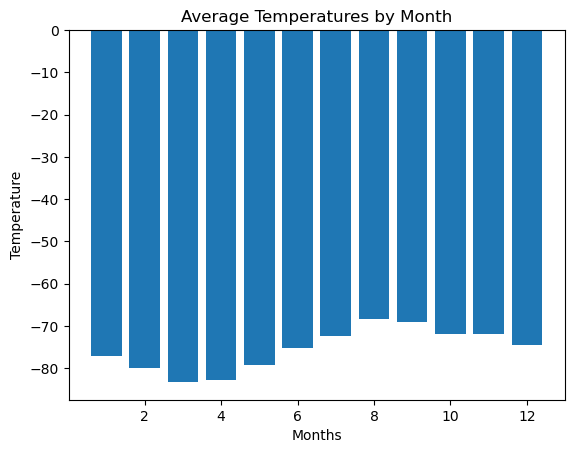

In [13]:
# find coldest and warmest Mars month
min_max_months = mars_temps_df.groupby('month').mean('min_temp')

months = pd.Series(range(1,min_max_months['id'].count() + 1))
# Plot results in bar graph
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.title("Average Temperatures by Month")
plt.bar(months, min_max_months['min_temp'])

#### Q: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

#### A: The month with the highest pressure is the nineth month and the sixth month has the lowest pressure.

<BarContainer object of 12 artists>

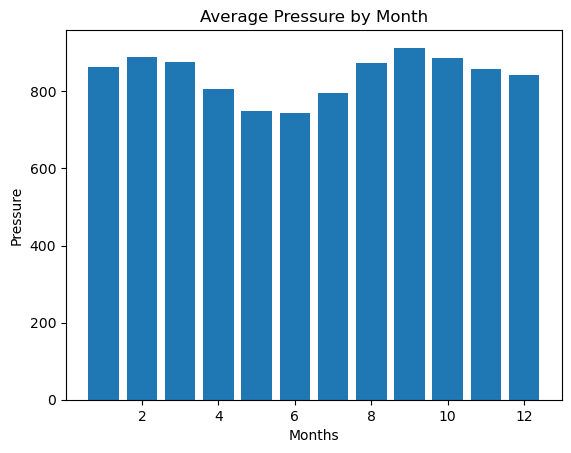

In [16]:
# Find the lowest and highest atmospheric pressure on Mars
mars_avg_pressure = mars_temps_df.groupby('month').mean('pressure')

months = pd.Series(range(1,mars_avg_pressure['id'].count() +1))

# Plot results in bar chart
plt.xlabel("Months")
plt.ylabel("Pressure")
plt.title("Average Pressure by Month")
plt.bar(months, mars_avg_pressure['pressure'])


#### Q: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

#### A: Assuming the lowest temperatures displayed on the graph mark a year on Mars, there seem to be over 500 but less than 700 earth days in one Mars year.

Text(0.5, 1.0, 'Lowest Daily Temperatures')

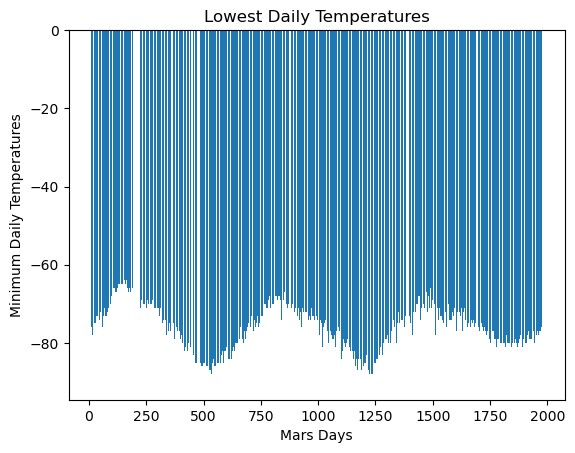

In [38]:
# Visually estimate the result by plotting the daily minimum temperature.
plt.bar(mars_temps_df['sol'], mars_temps_df['min_temp'])

# Create X & Y Labels
plt.xlabel('Mars Days')
plt.ylabel('Minimum Daily Temperatures')

# Create Chart title
plt.title('Lowest Daily Temperatures')

In [39]:
# Export the DataFrame to a CSV file.
mars_temps_df.to_csv('mars_temp_info.csv', index=False)

